# Classification using Tensorflow

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [47]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [48]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [49]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [50]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Clean the Data

In [51]:
#columns to normalize
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [52]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [53]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Feature Columns

In [54]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Continuous Features


* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [55]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical Features

If set of all possible feature values of a column are known and there are only a few of them, then **categorical_column_with_vocabulary_list** can be used. Otherwise use **categorical_column_with_hash_bucket**

In [56]:
diabetes['Group'].unique()

array(['B', 'C', 'A', 'D'], dtype=object)

In [57]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(key= 'Group', 
                                                                           vocabulary_list= ['A','B','C','D'])
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)
#where in place of 10 any lumber supposedly larger than number of classes can be put.

### Converting Continuous to Categorical

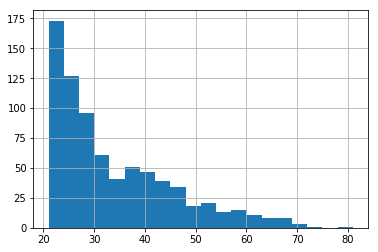

In [58]:
diabetes['Age'].hist(bins = 20)

In [59]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries= [20,30,40,50,60,70,80])

### Putting Together

In [60]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

### Train Test Split

In [66]:
x_data = diabetes.drop('Class', axis = 1)

In [67]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [68]:
labels = diabetes['Class']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state = 101)

### Input Function

In [71]:
input_func = tf.estimator.inputs.pandas_input_fn(x = x_train, y = y_train, batch_size= 10, num_epochs= 1000, shuffle= True)

### Creating the Model

In [72]:
model = tf.estimator.LinearClassifier(feature_columns= feat_cols, n_classes= 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_is_chief': True, '_keep_checkpoint_max': 5, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_task_id': 0, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002213FAAD278>, '_num_worker_replicas': 1, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\prash\\AppData\\Local\\Temp\\tmp1oynrp5u', '_evaluation_master': '', '_service': None, '_num_ps_replicas': 0, '_task_type': 'worker'}


In [73]:
model.train(input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prash\AppData\Local\Temp\tmp1oynrp5u\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 42.8474
INFO:tensorflow:loss = 4.309374, step = 100 (2.328 sec)
INFO:tensorflow:global_step/sec: 54.1059
INFO:tensorflow:loss = 8.036906, step = 200 (1.850 sec)
INFO:tensorflow:global_step/sec: 63.4609
INFO:tensorflow:loss = 6.3095427, step = 300 (1.574 sec)
INFO:tensorflow:global_step/sec: 55.9057
INFO:tensorflow:loss = 6.5719194, step = 400 (1.789 sec)
INFO:tensorflow:global_step/sec: 65.3744
INFO:tensorflow:loss = 7.3563166, step = 500 (1.531 sec)
INFO:tensorflow:global_step/sec: 61.5755
INFO:tensorflow:loss = 4.69767, step = 600 (1.625 sec)
INFO:tensorflow:global_step/sec: 

In [74]:
# https://stackoverflow.com/questions/44664285/what-are-the-contraints-for-tensorflow-scope-names

### Evaluation

In [76]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x_test, y_test, batch_size= 10
                                                      , num_epochs= 1, shuffle= False)

In [77]:
results =  model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-19-08:00:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\prash\AppData\Local\Temp\tmp1oynrp5u\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-19-08:00:17
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.809465, auc_precision_recall = 0.65801084, average_loss = 0.519076, global_step = 1000, label/mean = 0.35064936, loss = 4.996106, prediction/mean = 0.370904


In [78]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.809465,
 'auc_precision_recall': 0.65801084,
 'average_loss': 0.519076,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.996106,
 'prediction/mean': 0.370904}

### Predictions 

In [79]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x_test, batch_size = 10, num_epochs= 1, shuffle= False)

In [80]:
predictions = model.predict(pred_input_func)

In [81]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\prash\AppData\Local\Temp\tmp1oynrp5u\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5138949], dtype=float32),
  'logits': array([0.05559397], dtype=float32),
  'probabilities': array([0.48610508, 0.5138949 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6724021], dtype=float32),
  'logits': array([0.7190695], dtype=float32),
  'probabilities': array([0.32759792, 0.6724021 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.357111], dtype=float32),
  'logits': array([-0.58792543], dtype=float32),
  'probabilities': array([0.642889, 0.357111], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.34495872], dtype=float32),
  'logits': array([-0.6412736], dtype=float32),
  'probabilities': array([0.6550413 , 0.34495866], dtype=float32)},
 {'class_ids': a

## --------------------------------------------------------------------------------------------------------------------------------

# DNN Classifier (Dense Neural Network)

In [83]:
dnn_model = tf.estimator.DNNClassifier(hidden_units= [10,10,10], feature_columns= feat_cols, n_classes= 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_is_chief': True, '_keep_checkpoint_max': 5, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_task_id': 0, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002213FB9F668>, '_num_worker_replicas': 1, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\prash\\AppData\\Local\\Temp\\tmpcjaou96y', '_evaluation_master': '', '_service': None, '_num_ps_replicas': 0, '_task_type': 'worker'}


In [84]:
dnn_model.train(input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [85]:
#Fixing this error
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/feature_column/feature_column.py

In [87]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension= 4)
#dimensions = No. of classes 

In [91]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age_buckets]

In [92]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [94]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_is_chief': True, '_keep_checkpoint_max': 5, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_task_id': 0, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002213FB85E10>, '_num_worker_replicas': 1, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\prash\\AppData\\Local\\Temp\\tmpd302nrhm', '_evaluation_master': '', '_service': None, '_num_ps_replicas': 0, '_task_type': 'worker'}


In [95]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prash\AppData\Local\Temp\tmpd302nrhm\model.ckpt.
INFO:tensorflow:loss = 6.5896206, step = 0
INFO:tensorflow:global_step/sec: 56.2588
INFO:tensorflow:loss = 7.2455873, step = 100 (1.775 sec)
INFO:tensorflow:global_step/sec: 71.3403
INFO:tensorflow:loss = 6.592174, step = 200 (1.406 sec)
INFO:tensorflow:global_step/sec: 68.7766
INFO:tensorflow:loss = 6.0204334, step = 300 (1.454 sec)
INFO:tensorflow:global_step/sec: 67.0729
INFO:tensorflow:loss = 3.4008615, step = 400 (1.491 sec)
INFO:tensorflow:global_step/sec: 71.7893
INFO:tensorflow:loss = 4.0440674, step = 500 (1.395 sec)
INFO:tensorflow:global_step/sec: 72.005
INFO:tensorflow:loss = 3.882472, step = 600 (1.387 sec)
INFO:tensorflow:global_step/sec

In [97]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=x_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [98]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-19-08:13:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\prash\AppData\Local\Temp\tmpd302nrhm\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-19-08:13:30
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77922076, accuracy_baseline = 0.64935064, auc = 0.83958846, auc_precision_recall = 0.7012222, average_loss = 0.48440427, global_step = 1000, label/mean = 0.35064936, loss = 4.662391, prediction/mean = 0.40978307


{'accuracy': 0.77922076,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83958846,
 'auc_precision_recall': 0.7012222,
 'average_loss': 0.48440427,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.662391,
 'prediction/mean': 0.40978307}

#### Voila!